In [1]:
import gym
from keras.optimizers import Adam

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback
from src.downsamplers import downsample_breakout

# Environment

In [3]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('BreakoutDeterministic-v4')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(4)

# Agent

In [6]:
agent = DeepQAgent(env, downsample_breakout,
    replay_memory_size=250000,
    optimizer=Adam(lr=1e-4),
    render_mode='rgb_array'
)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<BreakoutDeterministic-v4>>>,
    downsample=Downsampler(y=(32, 14), x=(8, 8), cut=[142]),
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2ba8b006d240>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x2ba8c37cb1e0>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [7]:
res_random = agent.play(games=30)
res_random

100%|██████████| 30/30 [00:12<00:00,  2.34game/s]


array([-1.,  1., -1.,  0., -1.,  2.,  1., -1.,  0., -1.,  0.,  0., -1.,
       -1., -1.,  0., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1.])

In [8]:
res_random.mean()

-0.4

In [9]:
agent.observe(50000)

100%|██████████| 50000/50000 [00:50<00:00, 986.21frame/s] 


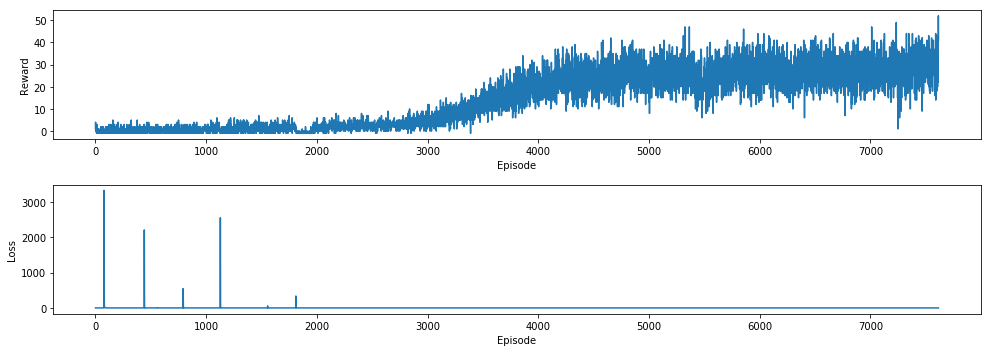

100%|██████████| 5000000/5000000 [7:53:45<00:00, 183.59frame/s]


In [10]:
callback = JupyterCallback()
agent.train(frames_to_play=5000000, callback=callback)

In [11]:
res_trained = agent.play(games=30)
res_trained

100%|██████████| 30/30 [01:32<00:00,  3.07s/game]


array([29., 34., 46., 27., 35., 48., 39., 26., 30., 31., 43., 42., 29.,
       30., 42., 28., 30., 42., 28., 29., 31., 27., 65., 23., 28., 26.,
       31., 35., 20., 25.])

In [12]:
res_trained.mean()

33.3

In [13]:
!mkdir -p models
!mkdir -p models/dqn

In [14]:
agent.model.save_weights('./models/dqn/breakout.h5', overwrite=True)